<a href="https://colab.research.google.com/github/ssen23/Study/blob/main/25_09_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##제공 코드

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


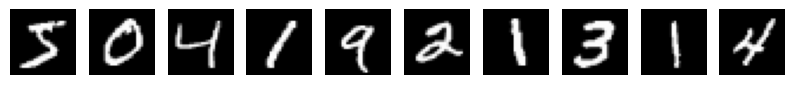

In [11]:
# prompt: train_images 10개만 시각화 해줘 한 줄로

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

##과제

1. scikit learn의 알고리즘으로 예측하여 가장 좋은 모델?
2. scikit learn의 의 예측모형과 CNN 모델의 평가지표를 비교하여 어떤 모델이 우월한지 근거를 제시하라.
3. confusion matrix / positive

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import mnist
import seaborn as sns
import time
import pandas as pd

# MNIST 데이터 로드 및 전처리 (샘플 크기 축소)
print("MNIST 데이터 로드 중...")
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# 데이터 크기 축소 - 훈련 데이터 10,000개, 테스트 데이터 2,000개만 사용
sample_train = 10000
sample_test = 2000

# 랜덤 샘플링
np.random.seed(42)
train_idx = np.random.choice(60000, sample_train, replace=False)
test_idx = np.random.choice(10000, sample_test, replace=False)

X_train = X_train_full[train_idx]
y_train = y_train_full[train_idx]
X_test = X_test_full[test_idx]
y_test = y_test_full[test_idx]

# CNN을 위한 원본 데이터는 4D 형태로 유지
X_train_cnn = X_train.reshape((sample_train, 28, 28, 1)).astype("float32") / 255
X_test_cnn = X_test.reshape((sample_test, 28, 28, 1)).astype("float32") / 255

# Scikit-learn을 위한 데이터는 2D로 변형
X_train_sklearn = X_train.reshape(sample_train, 784).astype("float32") / 255
X_test_sklearn = X_test.reshape(sample_test, 784).astype("float32") / 255

print(f"학습 데이터 크기: {X_train_sklearn.shape}")
print(f"테스트 데이터 크기: {X_test_sklearn.shape}")

MNIST 데이터 로드 중...
학습 데이터 크기: (10000, 784)
테스트 데이터 크기: (2000, 784)


In [7]:

# 1. Scikit-learn 모델들 정의 및 학습 (더 빠른 모델들로 선택)
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),  # 트리 수 감소
    'Support Vector Machine': SVC(kernel='rbf', C=1, gamma='scale', random_state=42),  # 기본 파라미터
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),  # 반복 횟수 감소
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),  # 깊이 제한
    'Naive Bayes': GaussianNB()
}

# 결과를 저장할 딕셔너리
results = {}

# 각 모델 학습 및 평가
print("\n=== Scikit-learn 모델들 학습 및 평가 ===")
for name, model in models.items():
    print(f"\n{name} 학습 중...")

    # 학습 시간 측정
    start_time = time.time()
    model.fit(X_train_sklearn, y_train)
    train_time = time.time() - start_time

    # 예측 시간 측정
    start_time = time.time()
    y_pred = model.predict(X_test_sklearn)
    pred_time = time.time() - start_time

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'train_time': train_time,
        'pred_time': pred_time
    }

    print(f"{name} - 정확도: {accuracy:.4f}, 학습시간: {train_time:.2f}초, 예측시간: {pred_time:.2f}초")


=== Scikit-learn 모델들 학습 및 평가 ===

Random Forest 학습 중...
Random Forest - 정확도: 0.9500, 학습시간: 4.96초, 예측시간: 0.03초

Support Vector Machine 학습 중...
Support Vector Machine - 정확도: 0.9665, 학습시간: 12.60초, 예측시간: 6.32초

K-Nearest Neighbors 학습 중...
K-Nearest Neighbors - 정확도: 0.9520, 학습시간: 0.01초, 예측시간: 1.08초

Logistic Regression 학습 중...
Logistic Regression - 정확도: 0.9070, 학습시간: 20.69초, 예측시간: 0.02초

Decision Tree 학습 중...
Decision Tree - 정확도: 0.8275, 학습시간: 2.52초, 예측시간: 0.00초

Naive Bayes 학습 중...
Naive Bayes - 정확도: 0.6080, 학습시간: 0.05초, 예측시간: 0.08초



=== CNN 모델 학습 ===
CNN 모델 학습 중...
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.7029 - loss: 0.9250
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9548 - loss: 0.1450
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9725 - loss: 0.0923
CNN - 정확도: 0.9600, 학습시간: 31.55초, 예측시간: 0.85초

=== 최종 결과 비교 ===

모델별 성능 순위:
                        accuracy  train_time  pred_time
Support Vector Machine    0.9665   12.600437   6.323459
CNN                       0.9600   31.553272   0.851975
K-Nearest Neighbors       0.9520    0.005160   1.079009
Random Forest             0.9500    4.958641   0.034958
Logistic Regression       0.9070   20.686555   0.016850
Decision Tree             0.8275    2.515903   0.002248
Naive Bayes               0.6080    0.048230   0.081866

1. Scikit-learn 최고 성능 모델: Support Vector Machine
   정확도: 0.9665

2. CNN 모델 성능:
   정확도: 0.9600


/tmp/ipython-input-1313985686.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
/tmp/ipython-input-1313985686.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(results_df.index, rotation=45, ha='right')
/tmp/ipython-input-1313985686.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
/tmp/ipython-input-1313985686.py:94: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1313985686.py:94: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


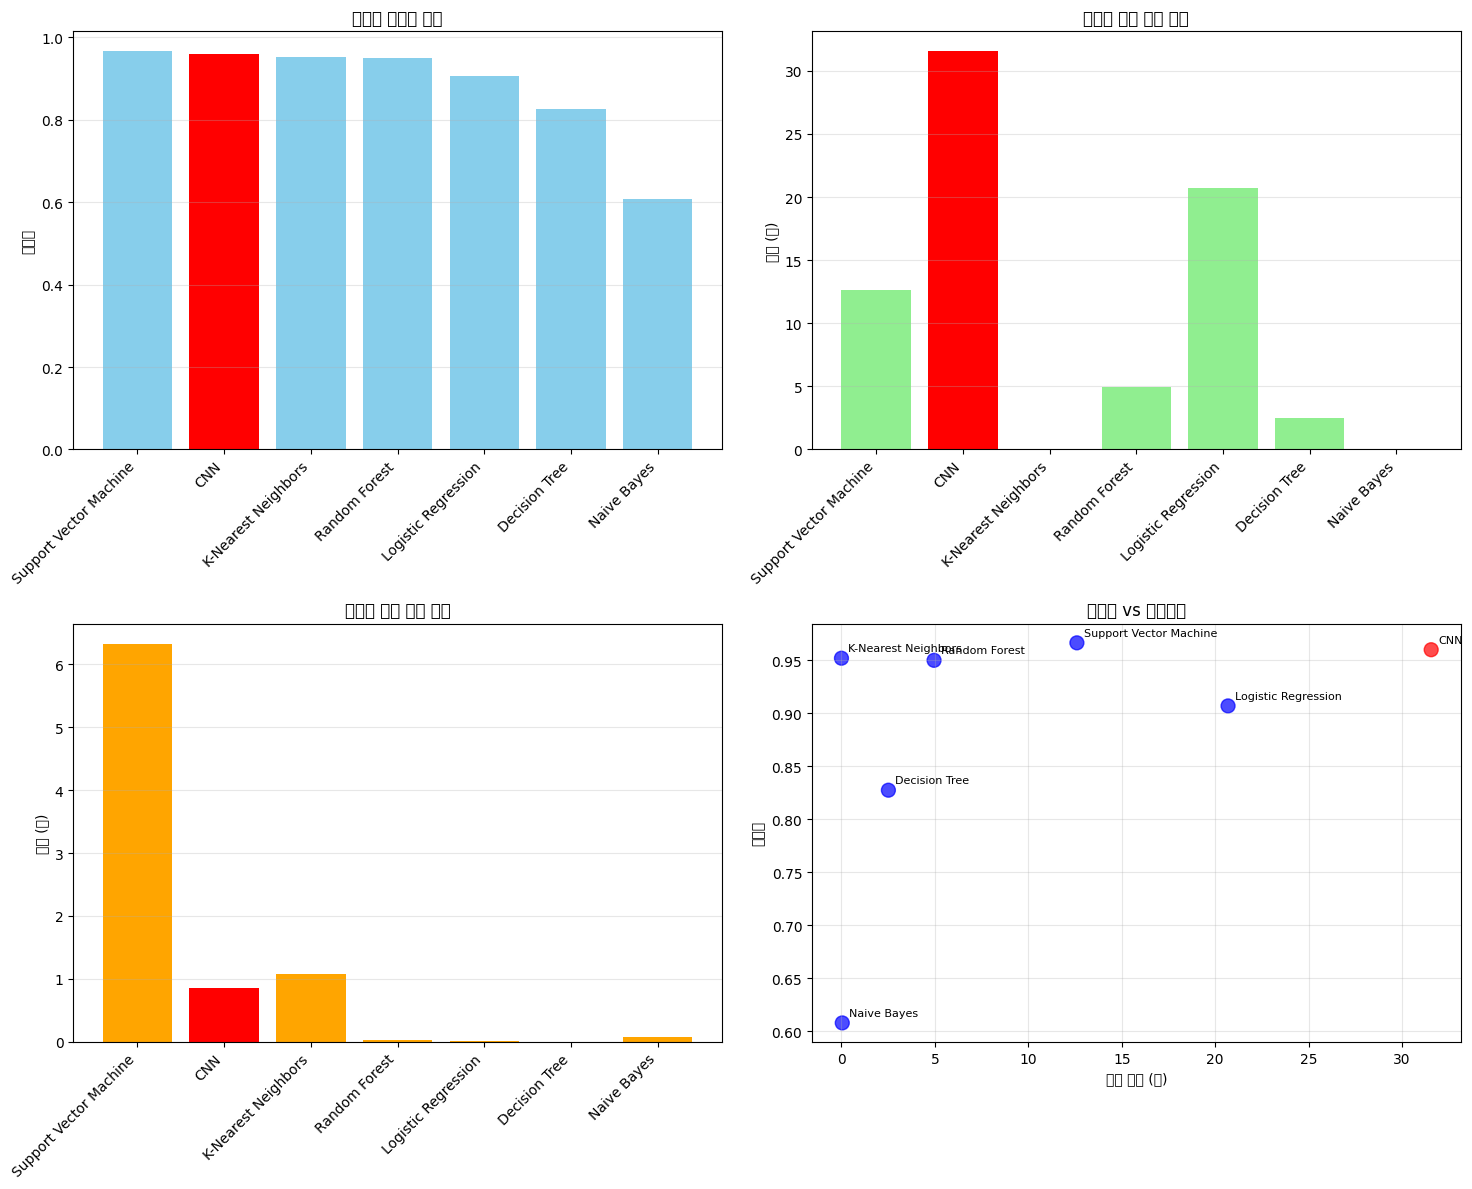

In [8]:

# 2. CNN 모델 구성 및 학습
print("\n=== CNN 모델 학습 ===")
from tensorflow import keras
from tensorflow.keras import layers

# CNN 모델 정의
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn_model = keras.Model(inputs=inputs, outputs=outputs)

cnn_model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

# CNN 학습 시간 측정 (에포크 감소)
print("CNN 모델 학습 중...")
start_time = time.time()
history = cnn_model.fit(X_train_cnn, y_train, epochs=3, batch_size=64, verbose=1)  # 에포크를 3으로 감소
cnn_train_time = time.time() - start_time

# CNN 평가 시간 측정
start_time = time.time()
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
cnn_pred_time = time.time() - start_time

results['CNN'] = {
    'accuracy': cnn_accuracy,
    'train_time': cnn_train_time,
    'pred_time': cnn_pred_time
}

print(f"CNN - 정확도: {cnn_accuracy:.4f}, 학습시간: {cnn_train_time:.2f}초, 예측시간: {cnn_pred_time:.2f}초")

# 3. 결과 분석 및 시각화
print("\n=== 최종 결과 비교 ===")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('accuracy', ascending=False)

print("\n모델별 성능 순위:")
print(results_df)

# 최고 성능 모델 찾기
best_sklearn_model = results_df.drop('CNN').index[0]
best_sklearn_acc = results_df.drop('CNN')['accuracy'].iloc[0]

print(f"\n1. Scikit-learn 최고 성능 모델: {best_sklearn_model}")
print(f"   정확도: {best_sklearn_acc:.4f}")

print(f"\n2. CNN 모델 성능:")
print(f"   정확도: {cnn_accuracy:.4f}")

# 성능 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 정확도 비교
axes[0, 0].bar(results_df.index, results_df['accuracy'], color=['red' if x == 'CNN' else 'skyblue' for x in results_df.index])
axes[0, 0].set_title('모델별 정확도 비교')
axes[0, 0].set_ylabel('정확도')
axes[0, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# 학습 시간 비교
axes[0, 1].bar(results_df.index, results_df['train_time'], color=['red' if x == 'CNN' else 'lightgreen' for x in results_df.index])
axes[0, 1].set_title('모델별 학습 시간 비교')
axes[0, 1].set_ylabel('시간 (초)')
axes[0, 1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 예측 시간 비교
axes[1, 0].bar(results_df.index, results_df['pred_time'], color=['red' if x == 'CNN' else 'orange' for x in results_df.index])
axes[1, 0].set_title('모델별 예측 시간 비교')
axes[1, 0].set_ylabel('시간 (초)')
axes[1, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 정확도 vs 학습시간 산점도
axes[1, 1].scatter(results_df['train_time'], results_df['accuracy'],
                   c=['red' if x == 'CNN' else 'blue' for x in results_df.index],
                   s=100, alpha=0.7)
for i, txt in enumerate(results_df.index):
    axes[1, 1].annotate(txt, (results_df['train_time'].iloc[i], results_df['accuracy'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('학습 시간 (초)')
axes[1, 1].set_ylabel('정확도')
axes[1, 1].set_title('정확도 vs 학습시간')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:

# 4. 상세 분석 결과
print("\n=== 상세 분석 결과 ===")

print(f"\n📊 성능 분석:")
print(f"• 최고 정확도: CNN ({cnn_accuracy:.4f})")
print(f"• Scikit-learn 최고: {best_sklearn_model} ({best_sklearn_acc:.4f})")
print(f"• 성능 차이: {(cnn_accuracy - best_sklearn_acc)*100:.2f}%p")

print(f"\n⏱️ 시간 효율성:")
fastest_train = results_df['train_time'].min()
fastest_pred = results_df['pred_time'].min()
fastest_train_model = results_df[results_df['train_time'] == fastest_train].index[0]
fastest_pred_model = results_df[results_df['pred_time'] == fastest_pred].index[0]

print(f"• 가장 빠른 학습: {fastest_train_model} ({fastest_train:.2f}초)")
print(f"• 가장 빠른 예측: {fastest_pred_model} ({fastest_pred:.2f}초)")
print(f"• CNN 학습시간: {cnn_train_time:.2f}초")
print(f"• CNN 예측시간: {cnn_pred_time:.2f}초")

print(f"\n🎯 결론:")
if cnn_accuracy > best_sklearn_acc:
    print(f"• CNN 모델이 {(cnn_accuracy - best_sklearn_acc)*100:.2f}%p 더 높은 정확도를 보임")
    print(f"• 이미지 분류 작업에서 CNN의 우수성이 입증됨")
else:
    print(f"• {best_sklearn_model}이 CNN보다 {(best_sklearn_acc - cnn_accuracy)*100:.2f}%p 더 높은 정확도를 보임")

print(f"• 학습 시간 대비 성능을 고려할 때, CNN은 높은 정확도를 달성하지만 상당한 학습 시간이 필요함")
print(f"• 실시간 예측이 중요한 경우, {fastest_pred_model}가 가장 적합함")



=== 상세 분석 결과 ===

📊 성능 분석:
• 최고 정확도: CNN (0.9600)
• Scikit-learn 최고: Support Vector Machine (0.9665)
• 성능 차이: -0.65%p

⏱️ 시간 효율성:
• 가장 빠른 학습: K-Nearest Neighbors (0.01초)
• 가장 빠른 예측: Decision Tree (0.00초)
• CNN 학습시간: 31.55초
• CNN 예측시간: 0.85초

🎯 결론:
• Support Vector Machine이 CNN보다 0.65%p 더 높은 정확도를 보임
• 학습 시간 대비 성능을 고려할 때, CNN은 높은 정확도를 달성하지만 상당한 학습 시간이 필요함
• 실시간 예측이 중요한 경우, Decision Tree가 가장 적합함



=== 최고 성능 모델들의 혼동 행렬 비교 ===
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/

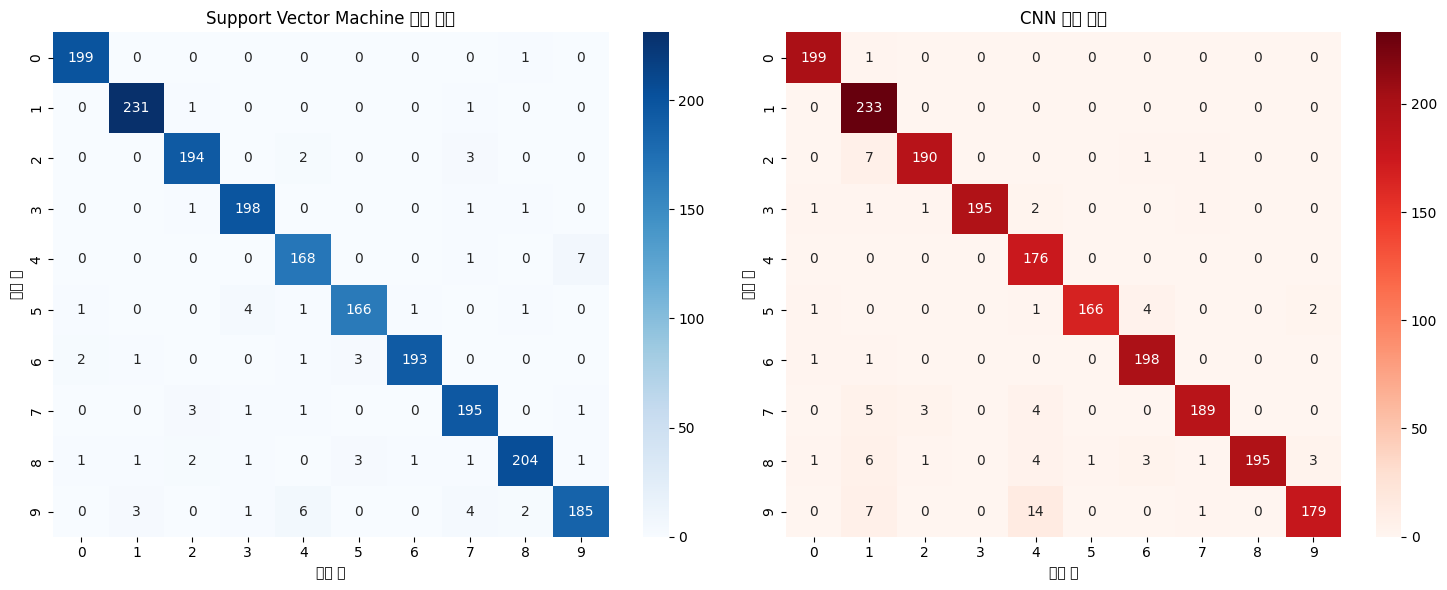


=== 클래스별 성능 분석 ===

Support Vector Machine 클래스별 리포트:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.98      0.99      0.99       233
           2       0.97      0.97      0.97       199
           3       0.97      0.99      0.98       201
           4       0.94      0.95      0.95       176
           5       0.97      0.95      0.96       174
           6       0.99      0.96      0.98       200
           7       0.95      0.97      0.96       201
           8       0.98      0.95      0.96       215
           9       0.95      0.92      0.94       201

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


CNN 클래스별 리포트:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.89      1.00      0.94       233
         

In [10]:
# 5. 혼동 행렬로 최고 성능 모델들 비교
print(f"\n=== 최고 성능 모델들의 혼동 행렬 비교 ===")

# 최고 성능 sklearn 모델의 예측
best_model = models[best_sklearn_model]
best_pred = best_model.predict(X_test_sklearn)

# CNN 예측
cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# 혼동 행렬 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sklearn 최고 모델 혼동 행렬
cm_sklearn = confusion_matrix(y_test, best_pred)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'{best_sklearn_model} 혼동 행렬')
axes[0].set_ylabel('실제 값')
axes[0].set_xlabel('예측 값')

# CNN 혼동 행렬
cm_cnn = confusion_matrix(y_test, cnn_pred)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('CNN 혼동 행렬')
axes[1].set_ylabel('실제 값')
axes[1].set_xlabel('예측 값')

plt.tight_layout()
plt.show()

print("\n=== 클래스별 성능 분석 ===")
print(f"\n{best_sklearn_model} 클래스별 리포트:")
print(classification_report(y_test, best_pred))

print(f"\nCNN 클래스별 리포트:")
print(classification_report(y_test, cnn_pred))